In [7]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
plt.style.use('seaborn')
healthspent = requests.get('https://www.theglobaleconomy.com/rankings/health_spending_per_capita/')
HS = bs(healthspent.content, 'lxml')
table = HS.find("table", {"class":"sortable"})
HSpcap = pd.read_html(str(table))[0]
HSpcap

,Countries,"Health spending per capita, 2019",Global rank,Available data
0,USA,10921.01,1,2000 - 2019
1,Switzerland,9666.34,2,2000 - 2019
2,Norway,8007.40,3,2000 - 2019
3,Iceland,6274.96,4,2000 - 2019
4,Luxembourg,6220.74,5,2000 - 2019
...,...,...,...,...
176,Ethiopia,26.74,177,2000 - 2019
177,Eritrea,25.27,178,2000 - 2019
178,Burundi,20.57,179,2000 - 2019
179,DR Congo,20.57,180,2000 - 2019


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fs22_sales = pd.read_csv('/Users/eoin/Downloads/IndividualSalesReport_2022.csv')
fs22_sales.set_index('Sales Region Country')
fs22grouped = fs22_sales.groupby("Sales Region Country").sum()
fs22sorted = fs22grouped.sort_values("Premium (converted)", ascending=False)
fs22filtered = fs22sorted.drop(columns=["Premium"])
fs22renamed = fs22filtered.rename(columns={'Won': 'Policies won', 'Premium (converted)': 'Total Premium (€)'})
Aver_premium = fs22renamed['Total Premium (€)'] / fs22renamed['Policies won']
fs22newcolumn = fs22renamed.assign(Prem_average=Aver_premium)
display(fs22newcolumn.dtypes)
fs22complete = fs22newcolumn.astype({"Total Premium (€)":'int', "Prem_average":'int'})
fs22complete

Policies won           int64
Total Premium (€)    float64
Prem_average         float64
dtype: object

,Policies won,Total Premium (€),Prem_average
Sales Region Country,,,
Germany,98,418177,4267
Great Britain,61,415201,6806
Singapore,36,359221,9978
France,98,289727,2956
United States of America,20,203240,10162
...,...,...,...
Chad,1,1315,1315
Nicaragua,1,1305,1305
Guinea-Bissau,1,844,844


In [14]:
SalesQ1_Q2 = fs22complete.merge(HSpcap, left_on='Sales Region Country', right_on='Countries')
Q1_Q2index = SalesQ1_Q2.set_index('Countries').head(10)
Q1_Q2sorted = Q1_Q2index.sort_values("Total Premium (€)", ascending=False)
Q1_Q2sorted.drop(columns=["Available data"]).head(10)

,Policies won,Total Premium (€),Prem_average,"Health spending per capita, 2019",Global rank
Countries,,,,,
Germany,98,418177,4267,5440.25,8
Singapore,36,359221,9978,2632.71,27
France,98,289727,2956,4491.74,15
Spain,64,201339,3145,2711.19,26
Thailand,31,176605,5696,296.17,99
China,21,131817,6277,535.13,74
Italy,56,125011,2232,2905.50,24
Belgium,120,118159,984,4960.39,14
Russia,12,112232,9352,653.42,67


In [9]:
Top_Countries = {'country':    ['Germany', 'Singapore', 'France', 'Spain', 'Thailand', 'China', 'Italy', 'Belgium', 'Russia', 'Portugal', 'Mexico', 'Indonesia', 'Taiwan', 'UAE', 'Vietnam', 'Australia'],
         'Expat_ranking':    ['42', '10', '31', '5', '8', '33', '44', '29', '17', '4', '1', '2', '3', '6', '7', '9']}
Expat_Top_C = pd.DataFrame(Top_Countries).set_index('country')
Expat_Top_C.sort_values("Expat_ranking", ascending=True)

,Expat_ranking
country,
Mexico,1
Singapore,10
Russia,17
Indonesia,2
Belgium,29
Taiwan,3
France,31
China,33
Portugal,4


In [10]:
SalesQ1_Q2 = fs22complete.merge(HSpcap, left_on='Sales Region Country', right_on='Countries')
Q1_Q2ERadd = SalesQ1_Q2.merge(Expat_Top_C, left_on='Countries', right_on='country') 
Q1_Q2sorted = Q1_Q2ERadd.sort_values("Total Premium (€)", ascending=False)
TopQ1_Q2 = Q1_Q2sorted.drop(columns=["Available data"]).head(10)
TopQ1_Q2.set_index('Countries')

,Policies won,Total Premium (€),Prem_average,"Health spending per capita, 2019",Global rank,Expat_ranking
Countries,,,,,,
Germany,98,418177,4267,5440.25,8,42
Singapore,36,359221,9978,2632.71,27,10
France,98,289727,2956,4491.74,15,31
Spain,64,201339,3145,2711.19,26,5
Thailand,31,176605,5696,296.17,99,8
China,21,131817,6277,535.13,74,33
Italy,56,125011,2232,2905.50,24,44
Belgium,120,118159,984,4960.39,14,29
Russia,12,112232,9352,653.42,67,17


<AxesSubplot:xlabel='Sale date', ylabel='Premium (converted)'>

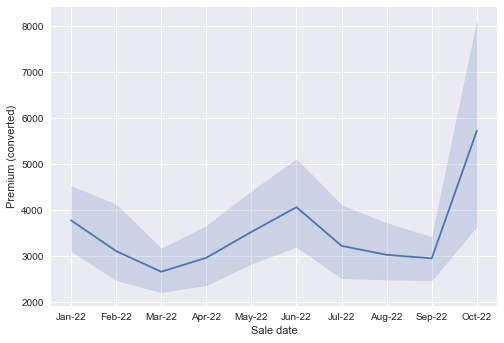

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fs22_sales = pd.read_csv('/Users/eoin/Downloads/IndividualSalesReport_2022.csv')
sns.lineplot(data=fs22_sales, x='Sale date', y='Premium (converted)')

<AxesSubplot:xlabel='Sale date', ylabel='Premium (converted)'>

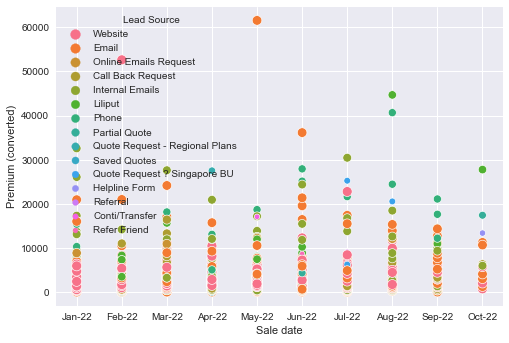

In [16]:
fs22_sales = pd.read_csv('/Users/eoin/Downloads/IndividualSalesReport_2022.csv')
sns.scatterplot(x='Sale date',y='Premium (converted)', data=fs22_sales, hue='Lead Source', size='Lead Source')

<AxesSubplot:xlabel='Sale date', ylabel='Premium (converted)'>

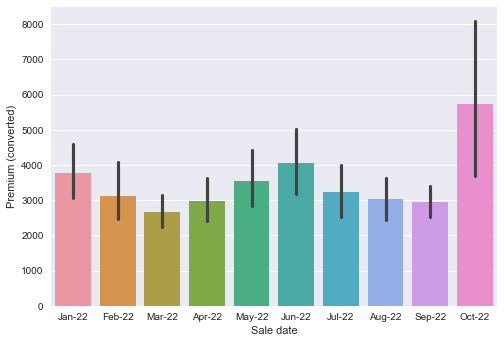

In [17]:
fs22_sales = pd.read_csv('/Users/eoin/Downloads/IndividualSalesReport_2022.csv')
sns.barplot(data=fs22_sales, y='Premium (converted)', x='Sale date')